In [25]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn as skl
import seaborn as sns

In [5]:
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data"

columns = ['age', 'workclass', 'fnlwgt', 'education', 'education-num', 'marital-status',
           'occupation', 'relationship', 'race', 'sex', 'capital-gain', 'capital-loss',
           'hours-per-week', 'native-country', 'income']

In [6]:
df = pd.read_csv(
    url,
    names=columns,
    skipinitialspace=True
)

In [7]:
df.replace('?', np.nan, inplace=True)
df.replace(' ?', np.nan, inplace=True)

In [15]:
df.shape

(32561, 15)

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       30725 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education-num   32561 non-null  int64 
 5   marital-status  32561 non-null  object
 6   occupation      30718 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital-gain    32561 non-null  int64 
 11  capital-loss    32561 non-null  int64 
 12  hours-per-week  32561 non-null  int64 
 13  native-country  31978 non-null  object
 14  income          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [18]:
df.duplicated().sum()

np.int64(24)

In [19]:
df.dtypes

,0
age,int64
workclass,object
fnlwgt,int64
education,object
education-num,int64
marital-status,object
occupation,object
relationship,object
race,object
sex,object


In [20]:
df.isna().sum().sort_values() #cantidad de datos NaN

,0
age,0
fnlwgt,0
education,0
education-num,0
relationship,0
marital-status,0
sex,0
race,0
hours-per-week,0
income,0


In [14]:
(df.isnull().mean() * 100).round(2)  # porcentaje de datos nulos sobre el total de datos.

,0
age,0.00
workclass,5.64
fnlwgt,0.00
education,0.00
education-num,0.00
marital-status,0.00
occupation,5.66
relationship,0.00
race,0.00
sex,0.00


1) Valores faltantes
a. ¿Cuántas filas tienen al menos un valor faltante? ¿Qué porcentaje representan sobre el
total?



Como valor faltante se detectan las variables "workclass, occupation y native-country, con la siguiente cantidad.

VARIABLE          CANTIDAD DE NaN

workclass               1836

occupation              1843

native-country          583

¿Qué porcentaje representan sobre el total?

workclass tiene un porcentaje del 5.64%

occupation tiene un porcentaje del 5.66%

native-country tiene un porcentaje del 1.79%



In [21]:
df.shape #corroboro antes de eliminar las filas cuantos registros tengo.

(32561, 15)

In [22]:
df.dropna(inplace=True) #elimnino filas con datos NaN

In [23]:
df.shape #luego de eliminar, corroboro nuevamente para ver que efectivamente se han eliminado dichos registros

(30162, 15)

b. Eliminá esas filas. ¿Cuántas quedaron?
Luego de eliminar los datos Nan el total de registros que han quedado en el DF es de 30162.

c. Desde lo teórico: ¿qué ventajas y desventajas tiene eliminar filas con valores faltantes?

Ventajas:

Simplicidad: Es muy fácil de implementar, rápido y no requiere supuestos complejos.

SIMPLICIDAD: es simple de implementar y rapido.

DATOS PUROS: mantenemos en el DF los datos completos, por si utilizamos herramientas que no soporten para el proceso datos NaN

Desventajas:

PERDIDA DE INFORMACION: al eliminar, lamentablemente estamos dejando datos en el camino.

TAMAÑO DEL DATASET: de ser un DATASET pequeño, segun la cantidad a eliminar, puede dejarnos con una merma importante de datos para el analisis.


¿Cuándo convendría imputar?

nos conviene imputar dichos datos con alguna estimacion segun sea el caso cuando la perdida de informacion sea tal que dejemos un DATASET con pocos datos y no nos sirva para una toma de decision acertada o quiza mas concisa a la hora del analisis.

2) Outliers (valores atípicos)
a. Usá boxplots para detectar valores atípicos en las siguientes variables: age, hours-per-week,
capital-gain, capital-loss.


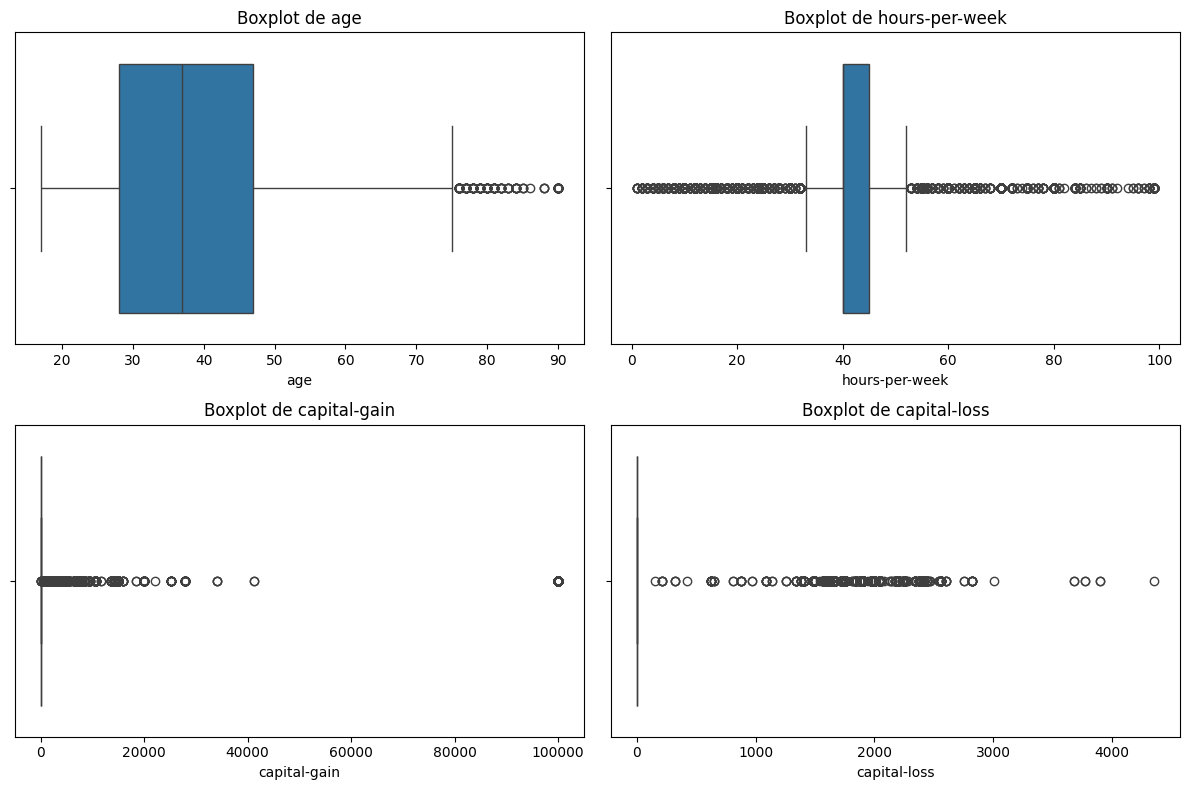

In [26]:
variables = ['age', 'hours-per-week', 'capital-gain', 'capital-loss']

plt.figure(figsize=(12, 8))

for i, var in enumerate(variables, 1):
    plt.subplot(2, 2, i)
    sns.boxplot(x=df[var])
    plt.title(f'Boxplot de {var}')

plt.tight_layout()
plt.show()

b. Aplicá la técnica intercuartílica para contar cuántos valores atípicos hay en cada una.



In [31]:
variables = ['age', 'hours-per-week', 'capital-gain', 'capital-loss']

Q1 = df[variables].quantile(0.25)
Q3 = df[variables].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR


outliers = (df[variables] < lower_bound) | (df[variables] > upper_bound)


cantidad_outliers = outliers.sum()

cantidad_outliers

,0
age,169
hours-per-week,7953
capital-gain,2538
capital-loss,1427


aplicando la tecnica intercuartilica, obtenemos que en el DF tenemos la siguiente cantidad.

age	169

hours-per-week	7953

capital-gain	2538

capital-loss	1427

c. Elegí una de estas variables y eliminá los outliers. Mostrá los gráficos antes y después.

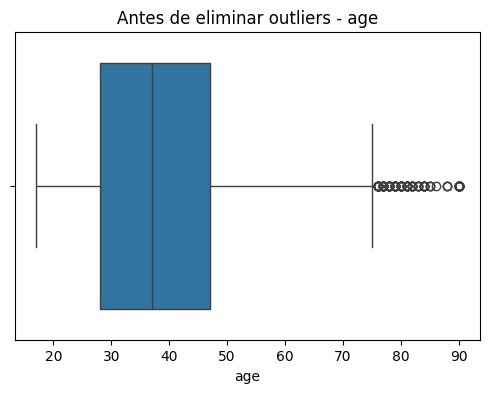

In [32]:
plt.figure(figsize=(6, 4))
sns.boxplot(x=df['age'])
plt.title('Antes de eliminar outliers - age')
plt.show()

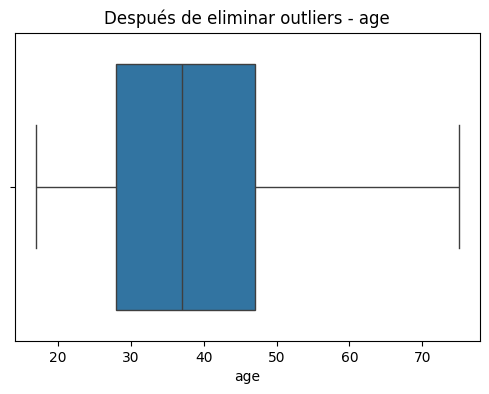

In [36]:
Q1 = df['age'].quantile(0.25)
Q3 = df['age'].quantile(0.75)
IQR = Q3 - Q1

LB = Q1 - 1.5 * IQR
UB = Q3 + 1.5 * IQR

df_sin_outliers_age = df[(df['age'] >= LB) & (df['age'] <= UB)]

plt.figure(figsize=(6, 4))
sns.boxplot(x=df_sin_outliers['age'])
plt.title('Después de eliminar outliers - age')
plt.show()

¿Qué cambia?

lo que cambia a simple vista es la dimension, ya que al no tener los outliers, el grafico muestra mas ampliado con las mismas dimensiones que el anterior.
pero lo mas significativo aunque no se distingue a simple vista es la variacion de la mediana ya que faltan datos que antes se tenian en cuenta para el analisis.

3)

Codificación del target y de variables categóricas
a. Codificá la variable income usando LabelEncoder y llamala income_encoded.


In [37]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
df['income_encoded'] = le.fit_transform(df['income'])

print(le.classes_)
print(df[['income', 'income_encoded']].head())

['<=50K' '>50K']
  income  income_encoded
0  <=50K               0
1  <=50K               0
2  <=50K               0
3  <=50K               0
4  <=50K               0


b. Aplicá OneHotEncoder a tres variables categóricas que consideres importantes. Justificá tu
elección.

Vamos a aplicar OneHotEncoder a las siguientes variables categoricas
dichas variables son elegidas, ya que contienen datos de distinta indole, son variados y poco efectivos para el procesamiento
- education

- marital-status

- workclass


In [43]:
from sklearn.preprocessing import OneHotEncoder

cols_to_encode = ['education', 'marital-status', 'workclass']

ohe = OneHotEncoder(sparse_output=False, drop='first')

encoded_array = ohe.fit_transform(df[cols_to_encode])

encoded_df = pd.DataFrame(encoded_array, columns=ohe.get_feature_names_out(cols_to_encode))

df_encoded = pd.concat([df.reset_index(drop=True), encoded_df.reset_index(drop=True)], axis=1)

print(df_encoded[encoded_df.columns].head())


   education_11th  education_12th  education_1st-4th  education_5th-6th  \
0             0.0             0.0                0.0                0.0   
1             0.0             0.0                0.0                0.0   
2             0.0             0.0                0.0                0.0   
3             1.0             0.0                0.0                0.0   
4             0.0             0.0                0.0                0.0   

   education_7th-8th  education_9th  education_Assoc-acdm  \
0                0.0            0.0                   0.0   
1                0.0            0.0                   0.0   
2                0.0            0.0                   0.0   
3                0.0            0.0                   0.0   
4                0.0            0.0                   0.0   

   education_Assoc-voc  education_Bachelors  education_Doctorate  ...  \
0                  0.0                  1.0                  0.0  ...   
1                  0.0              

c. ¿Qué problema puede generar OneHotEncoder si una variable tiene muchas categorías?

puede generar un aumento significativo del DATASET
Si una variable tiene 150 categorías, se crean 150 variables nuevas

4) División en entrenamiento y prueba
a. Separá el dataset en entrenamiento y prueba con la proporción que consideres adecuada.



In [56]:
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.linear_model import LogisticRegression

In [57]:
X = df.drop(columns=['income'])
Y = df['income']

X = df.drop(columns=['income'])
Y = df['income']

In [58]:
X_encoded = pd.get_dummies(X)


from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(
    X_encoded, Y, test_size=0.2, random_state=42, stratify=Y
)


from sklearn.linear_model import LogisticRegression
model = LogisticRegression(max_iter=1000)
model.fit(X_train, Y_train)

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(max_iter=1000)

b. ¿Qué puede pasar si usamos muy pocos datos para entrenar o muy pocos para testear?

1. al utilizar muy pocos para entrenar vamos a tener el inconveniente de que el modelo no va a aprender de forma generalizada y puede sesgarse a ese conjunto de datos ingresados, va a contar con baja precision al no tener suficiente enriquecimiento de datos y va a tener mas complejidad para una buena efectividad final.

2. Muy pocos datos para testear

la evaluacion sera poco confiable, ya que al utilizar pocos datos no va a poder representar la totalidad de los datos y los resultados seran poco fiables o no cubriran las espectativas requeridas, va a estar muy por los limites de bueno/malo.


5) Modelo: Árbol de Decisión
a. Entrená un DecisionTreeClassifier con random_state=42.



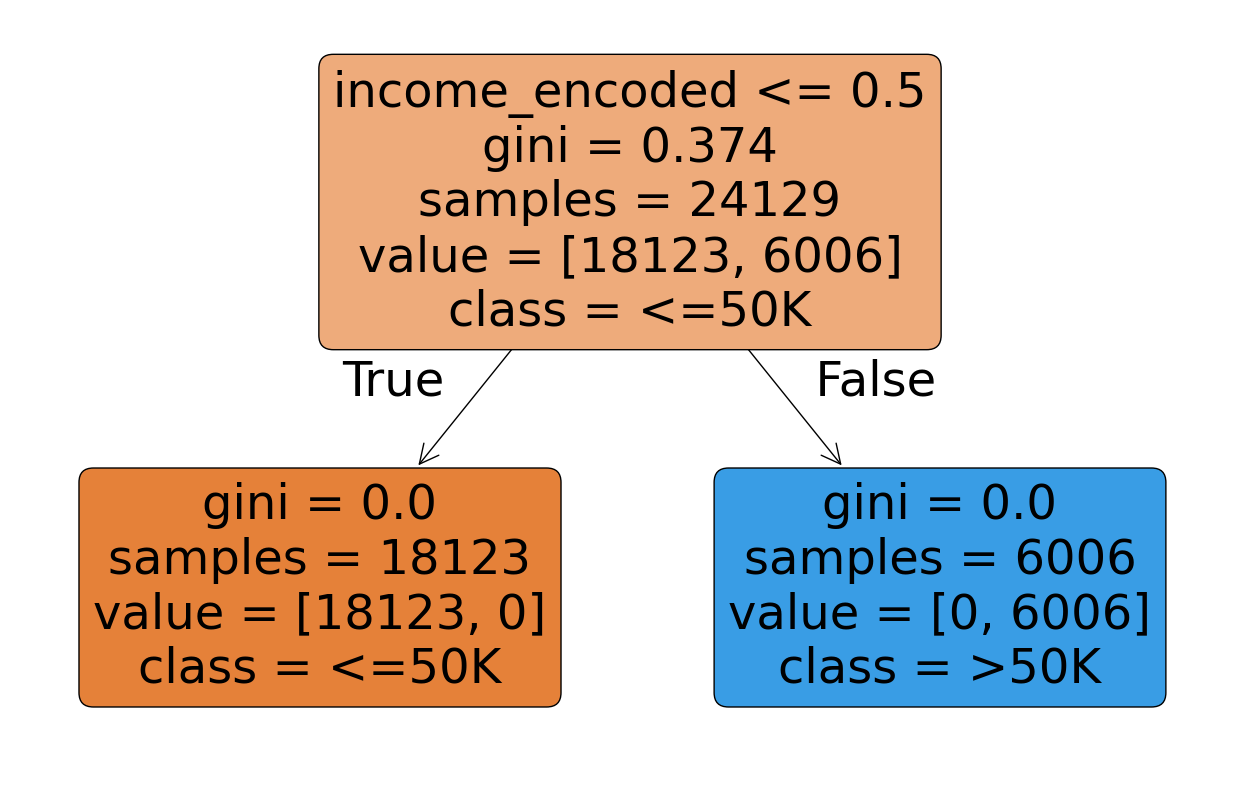

In [63]:
model = DecisionTreeClassifier(random_state=42)
model.fit(X_train, Y_train)
plt.figure(figsize=(16,10))
plot_tree(
    model,
    filled=True,
    feature_names=X_train.columns,
    class_names=model.classes_.astype(str),
    rounded=True
)
plt.show()

b. Mostrá: profundidad del árbol, cantidad de hojas y variables más importantes.

In [67]:
print("Profundidad del árbol:", model.get_depth())

print("Cantidad de hojas:", model.get_n_leaves())

importancias = model.feature_importances_
features = X_train.columns

df_importances = pd.DataFrame({
    'Feature': features,
    'Importancia': importancias
}).sort_values(by='Importancia', ascending=False)

print("\nVariables más importantes:")
df_importances.head(6)

Profundidad del árbol: 1
Cantidad de hojas: 2

Variables más importantes:


,Feature,Importancia
6,income_encoded,1.0
0,age,0.0
1,fnlwgt,0.0
3,capital-gain,0.0
2,education-num,0.0
4,capital-loss,0.0


c. ¿Qué ventajas tiene este modelo? ¿En qué casos no lo recomendarías?


Ventajas del Árbol de Decisión:

- como ventaja principal tiene que a simple vista es facil de entender e interpretar.

- poca preparacion de los datos para utilizarlos en el arbol de decision.

- puede trabajar con variables numericas y categoricas

- es un recurso rapido de entrenar para datasets chicos y hasta medianos.

Desventajas del Árbol de Decisión:

- tiene una tendencia al sobreajuste.

- es poco estable, es altamente sensible a pequeñas variaciones en los datos y estos pueden generar un cambio estructural visiblemente complejo

- con datasets grandes puede volverse un metodo muy lento.


6) Evaluación del modelo



a. Calculá las métricas: accuracy, precision, recall, f1-score.

In [73]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

Y_pred = model.predict(X_test)

accuracy = accuracy_score(Y_test, Y_pred)
precision = precision_score(Y_test, Y_pred, pos_label='>50K')  # ajustá el pos_label según tu caso
recall = recall_score(Y_test, Y_pred, pos_label='>50K')
f1 = f1_score(Y_test, Y_pred, pos_label='>50K')

print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1-score: {f1:.2f}")

Accuracy: 1.00
Precision: 1.00
Recall: 1.00
F1-score: 1.00


b. Mostrá la matriz de confusión.

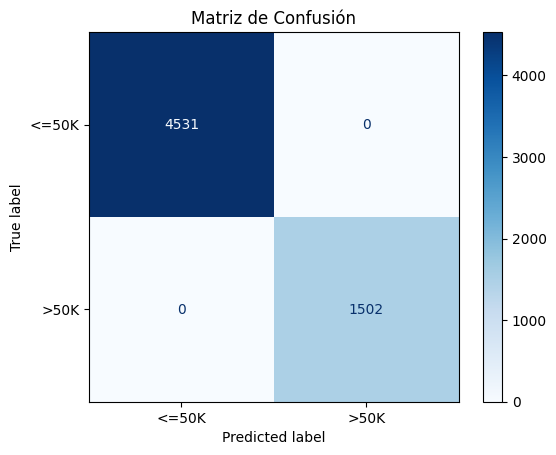

In [75]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(Y_test, Y_pred)

# Visualización
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
disp.plot(cmap='Blues')
plt.title("Matriz de Confusión")
plt.show()

c. Si estuvieras clasificando personas para recibir ayuda estatal, ¿qué métrica te parecería más
importante? Justificá.

la métrica que considero más importante es el "recall",
como la finalidad es encontrar personas que necesiten ayuda estatal y hay que ser muy especificos en los resultados y muy concisos, utilizaria un buen recall para que las personas que sean evaluadas tenga la precision de que seran los resultados correctos y no pase gente en las que verdaderamente necesiten y no se les otorgue por un error. (evitando los falsos negativos) *texto en cursiva*

7) Exploración sin supervisión: DBSCAN
a. Elegí dos o tres variables numéricas para analizar patrones (por ejemplo: capital-gain, hoursper-week, age).
b. Aplicá el algoritmo DBSCAN para detectar agrupamientos automáticos. Indicá los
parámetros usados (eps, min_samples).


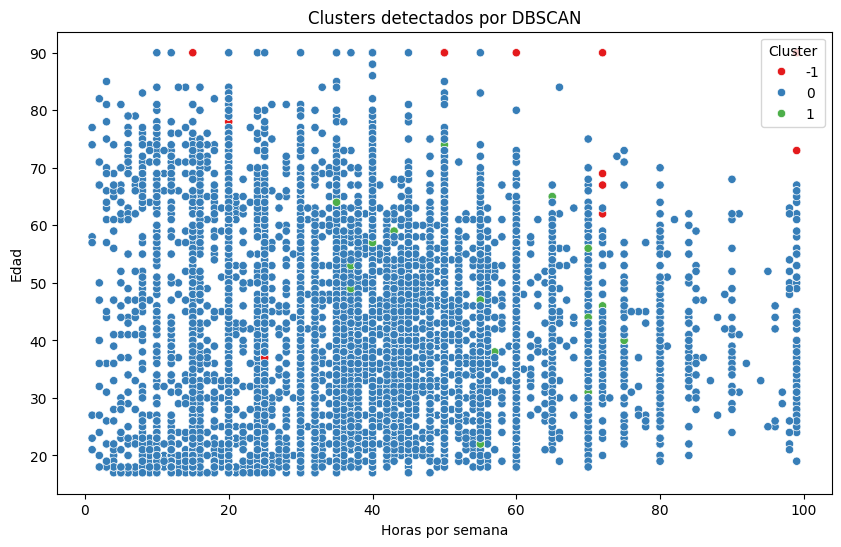

In [76]:
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns

num_vars = df[['capital-gain', 'hours-per-week', 'age']]


scaler = StandardScaler()
num_scaled = scaler.fit_transform(num_vars)


dbscan = DBSCAN(eps=0.9, min_samples=5)
clusters = dbscan.fit_predict(num_scaled)


df['cluster_dbscan'] = clusters


plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='hours-per-week', y='age', hue='cluster_dbscan', palette='Set1')
plt.title('Clusters detectados por DBSCAN')
plt.xlabel('Horas por semana')
plt.ylabel('Edad')
plt.legend(title='Cluster')
plt.show()

c. Graficá los datos en un scatter plot, coloreando los puntos por los clusters encontrados.

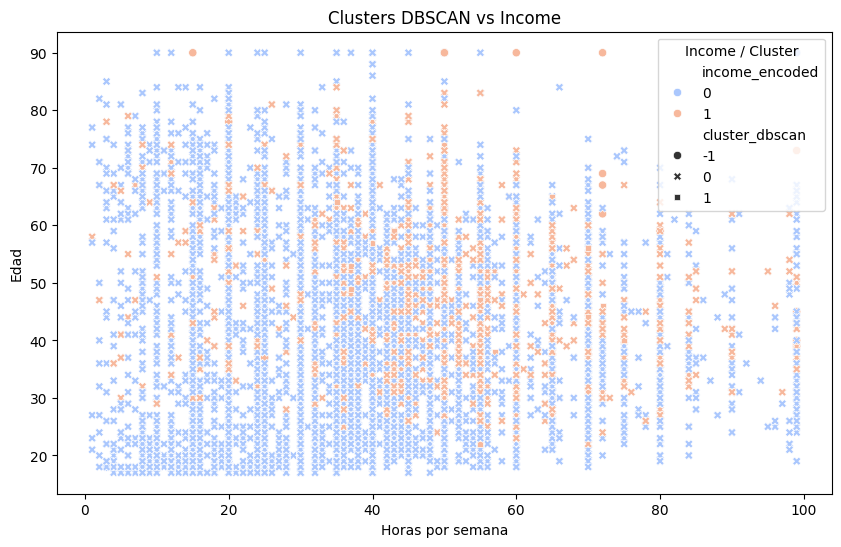

In [84]:
# Comparar clusters con income
plt.figure(figsize=(10, 6))
sns.scatterplot(
    data=df,
    x='hours-per-week',
    y='age',
    hue='income_encoded',
    style='cluster_dbscan',
    palette='coolwarm'
)
plt.title('Clusters DBSCAN vs Income')
plt.xlabel('Horas por semana')
plt.ylabel('Edad')
plt.legend(title='Income / Cluster')
plt.show()



d. ¿Qué observás? ¿DBSCAN logró identificar grupos diferenciados? ¿Coinciden con la variable income_encoded?

se logra diferenciar una segmentacion de un grupo diferenciado en la zona central entre las 35 y 70 hs de trabajo por semana. Y una edad aproximada de entre 25 y 60 años.
el DBSCAN al mostrar puntos de distintas formas y tamaños, nos indica que hay ruido o clusters distintos.

pero Los colores que representan income_encoded se mezclan dentro de varios clusters, lo que indica que dentro de un mismo cluster hay personas con diferentes niveles de ingresos.



Ventajas de DBSCAN
No necesita definir la cantidad de clusters a priori, lo cual es útil cuando no sabemos cuántos grupos hay en los datos.

Detecta clusters de forma arbitraria, no solo esféricos, lo que permite encontrar grupos con formas complejas.

Identifica automáticamente puntos atípicos o ruido (etiquetados como -1), ayudando a distinguir datos que no encajan en ningún grupo.

Es robusto para encontrar clusters en datos con densidades variables, siempre que los parámetros estén bien ajustados.

Funciona bien con datos con ruido y outliers, separándolos del resto.

Limitaciones de DBSCAN
La elección de los parámetros eps (radio de vecindad) y min_samples (mínimo de puntos para formar un cluster) es crítica y a veces difícil de ajustar.

No funciona bien si los clusters tienen densidades muy distintas, porque un solo eps puede no capturar todos los grupos correctamente.

Es sensible a la escala de las variables, por lo que siempre es necesario escalar o normalizar los datos antes de usarlo.

Para datasets con alta dimensionalidad, puede volverse menos efectivo debido a la "maldición de la dimensionalidad".

Al ser un algoritmo no supervisado, no garantiza que los clusters tengan relación con una variable objetivo (como el ingreso en este caso).

e. ¿Qué ventajas y limitaciones tiene DBSCAN para este tipo de análisis?

como Ventajas de DBSCAN tenemos que no necesitamos definir la cantidad de cluester al iniciar el analisis, lo cual nos sera util, cuando no sabemos cuantos grupos hay en los datos.

detecta clusters de distintas formas, por lo cual nos permite a simple vista detectar grupos

detecta valores atipicos o ruidos, lo que nos permite encontrar los datos que no encajan en ningun grupo

siempre que los parametros esten bien ajustados, es robusto para encontrar clusters en datos con densidades variables y es de buen tratamiento con datos que contengan ruido y con outliers (los discrimina del resto de los datos)


Limitaciones de DBSCAN

la limitacion mas compleja que cuenta DBSCAN es la eleccion de los parametros, ese ajuste sertero que nos va a proporcionar una entrega limpia, ya que los parametros de eps y min_samples es critico y a veces dificil de ajustar para que diferencie de forma certera el radio de vecindad y el minimo de puntos para formar un cluster.
no va a funcionar eficientemente cuando contenga clusters con densidades muy distintas
es muy sensible a la escala de las variables, por lo que se recomienda escalar o normalizar los datos antes de usarlo para una optima entrega del modelo


8) Variable fnlwgt
a. ¿Qué representa esta variable según la descripción del dataset?
la variable FNLWGT segun lo indicado en el enunciado representa "fnlwgt (peso final): Este es un peso calculado por el Censo que indica el número de personas
representadas por el individuo en el dataset.
"
por lo que significa que cada fila no solo representa a una persona, sino a un grupo ponderado de personas similares en la población total y este peso, se usa para obtener resultados estadísticamente representativos por la cantidad de datos que obtenemos del dataset


b. ¿La dejarías para entrenar un modelo? Justificá tu decisión con tu propio criterio.
por lo particular de la composicion de la variable no la utilizaria, ya que es una variable que agrupa una cantidad de datos variados y no representativos para el entrenamiento de un modelo preciso como nos gustaria obtener, sino que el resultado seria en base a una especie de prediccion de un grupo de personas con condiciones similares y no particulares.


c. Mostrá su distribución y comentá brevemente qué observás.


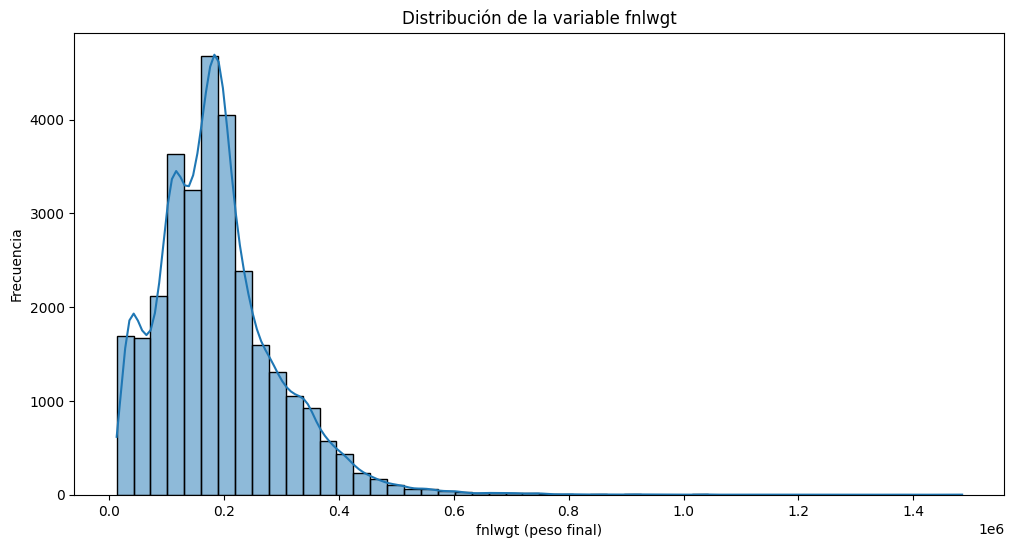

In [85]:
plt.figure(figsize=(12, 6))
sns.histplot(df['fnlwgt'], bins=50, kde=True)
plt.title('Distribución de la variable fnlwgt')
plt.xlabel('fnlwgt (peso final)')
plt.ylabel('Frecuencia')
plt.show()

se observa que la variable FNLWGT tiene una distribucion asimetrica (centrada entre los datos 0.0 y 0.4) en su mayoria. como asi tambien se muestra que algunos rangos son de mucha cantidad de frecuencia y otros muy bajos, por lo que genera una dispersion de los datos bastante alta.


9) Privacidad y anonimato
a. ¿Puede este dataset violar la privacidad aunque no tenga nombres? Explicá por qué.

SI, puede violar la privacidad aunque no tenga nombres, ya que de exponerse a un entorno para el cual no fue creado y teniendo en cuenta la combinacion de las distintas variables que son reales, permitiria identificar a personas, por lo que estaria incumpliendo con un PRINCIPIO ETICO FUNDAMENTAL como ser la PRIVACIDAD E INTEGRIDAD del proceso.


b. Nombrá dos medidas simples que ayudarían a proteger más la privacidad si este dataset se
hiciera público.

utilizaria la medida de ANONIMIZACION:
-practica etica escencial en la mineria de datos para proteger la privacidad de las personas y cumplir con normativas legales vigentes
-asegurar que los beneficios derivados del analisis de datos se logren sin comprometer la integridad y privacidad de los individuos.

REDUCIRIA LOS DATOS:
en datos generales, como Age, Country, Education, Capital Gain, Capital Loss, Hours Per Week utilizaria rangos especificos segun criterios mas generales que puntuales para que en caso de que se haga publico no se pueda identificar a personas de forma puntual violando su privacidad.



10) Discriminación y sesgos en datos
a. ¿Qué variables pueden introducir sesgos en modelos automáticos?

las variables que pueden introducir sesgos en modelos automaticos para futuras predicciones, son como por ejemplo, Age, Country, Race, Sex.

b. ¿Qué podría pasar si usás este dataset para predecir quién recibe un crédito bancario?
todo depende de las variables que utilice para tal fin, pero habria que tener cuidado, ya que segun distintas variables podria entregarse creditos a quien no los necesite de forma urgente, o no cuente con el respaldo suficiente para afrontar la deuda en la cual va a incurrir.



c. Proponé dos acciones concretas para reducir el riesgo de discriminación en este tipo de modelos.
como primer medida, no utilizaria las variables como Sex, Education, Race para entrenar al modelo ya que esto es mas sensible a discriminar personas.

que el modelo sea evaluado de forma correcta y concreta para evitar la discriminacion directa e indirecta a las personas en las cuales se aplicara el modelo. se debe de tener una especial atencion en las consecuencias de cada variable a utilizar y su posterior analisis, evitando de forma definitiva el sesgo en algunos sectores.